In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import scipy.stats as stats
import scipy.stats
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from mlxtend.classifier import StackingCVClassifier


# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [ ]:

df = pd.read_csv('loan_final313.csv')
df.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [ ]:
df=df.drop_duplicates()
df

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,2015,01/01/2015,1012016,8.0,RENT,1,Low,31000,1,...,0,11.99,B,2,28.69,3971.880000,2944.53,0.00,332.10,ulster
887375,36441262,2015,01/01/2015,1012016,10.0,MORTGAGE,3,Low,79000,1,...,0,11.99,B,2,3.90,9532.390000,7066.74,0.00,797.03,Northern-Irl
887376,36271333,2015,01/01/2015,1012016,5.0,RENT,1,Low,35000,1,...,0,15.99,D,4,30.90,3769.740000,1844.50,0.00,316.07,leinster
887377,36490806,2015,01/01/2015,1012016,1.0,RENT,1,Low,64400,1,...,0,19.99,E,5,27.19,3787.670000,1552.69,0.00,317.86,Northern-Irl


In [ ]:
df.drop(columns=['id'],inplace=True)

In [ ]:
df.head()

,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,loan_amount,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,5000,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,2500,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,2400,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,10000,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,3000,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  887379 non-null  int64  
 1   issue_d               887379 non-null  object 
 2   final_d               887379 non-null  int64  
 3   emp_length_int        887379 non-null  float64
 4   home_ownership        887379 non-null  object 
 5   home_ownership_cat    887379 non-null  int64  
 6   income_category       887379 non-null  object 
 7   annual_inc            887379 non-null  int64  
 8   income_cat            887379 non-null  int64  
 9   loan_amount           887379 non-null  int64  
 10  term                  887379 non-null  object 
 11  term_cat              887379 non-null  int64  
 12  application_type      887379 non-null  object 
 13  application_type_cat  887379 non-null  int64  
 14  purpose               887379 non-null  object 
 15  

In [ ]:
df.describe()

,year,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
count,887379.000000,8.873790e+05,887379.000000,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,2014.021761,1.047089e+06,6.050564,2.099130,7.502759e+04,1.196702,14755.264605,1.300045,1.000576,4.874621,1.475629,0.075987,13.246740,2.798403,18.157039,7558.826684,5757.706424,45.919243,436.717127
std,1.261741,4.555149e+04,3.507405,0.944839,6.469815e+04,0.442542,8435.455601,0.458278,0.023990,2.381156,0.499406,0.264977,4.381867,1.312599,17.190626,7871.243336,6625.441046,409.693874,244.186593
min,2007.000000,1.012008e+06,0.500000,1.000000,0.000000e+00,1.000000,500.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.320000,1.000000,0.000000,0.000000,0.000000,0.000000,15.670000
25%,2013.000000,1.012016e+06,3.000000,1.000000,4.500000e+04,1.000000,8000.000000,1.000000,1.000000,3.000000,1.000000,0.000000,9.990000,2.000000,11.910000,1914.590000,1200.570000,0.000000,260.705000
50%,2014.000000,1.012016e+06,6.050000,3.000000,6.500000e+04,1.000000,13000.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12.990000,3.000000,17.650000,4894.999117,3215.320000,0.000000,382.550000
75%,2015.000000,1.092015e+06,10.000000,3.000000,9.000000e+04,1.000000,20000.000000,2.000000,1.000000,6.000000,2.000000,0.000000,16.200000,4.000000,23.950000,10616.814230,8000.000000,0.000000,572.600000
max,2015.000000,1.122015e+06,10.000000,6.000000,9.500000e+06,3.000000,35000.000000,2.000000,2.000000,14.000000,2.000000,1.000000,28.990000,7.000000,9999.000000,57777.579870,35000.030000,33520.270000,1445.460000


In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


In [ ]:
df.head()

,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,loan_amount,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,5000,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,2500,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,2400,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,10000,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,3000,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [ ]:
df.isnull().sum()

year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
loan_condition_cat      0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
dtype: int64

In [ ]:
df['year'].unique()

array([2011, 2010, 2009, 2008, 2007, 2013, 2012, 2014, 2015], dtype=int64)

In [ ]:
df['issue_d'].unique

<bound method Series.unique of 0         01/12/2011
1         01/12/2011
2         01/12/2011
3         01/12/2011
4         01/12/2011
             ...    
887374    01/01/2015
887375    01/01/2015
887376    01/01/2015
887377    01/01/2015
887378    01/01/2015
Name: issue_d, Length: 887379, dtype: object>

In [ ]:
df['final_d'].unique


<bound method Series.unique of 0         1012015
1         1042013
2         1062014
3         1012015
4         1012016
           ...   
887374    1012016
887375    1012016
887376    1012016
887377    1012016
887378    1012016
Name: final_d, Length: 887379, dtype: int64>

In [ ]:
df['emp_length_int'].unique

<bound method Series.unique of 0         10.0
1          0.5
2         10.0
3         10.0
4          1.0
          ... 
887374     8.0
887375    10.0
887376     5.0
887377     1.0
887378    10.0
Name: emp_length_int, Length: 887379, dtype: float64>

In [ ]:
df['home_ownership_cat'].unique

<bound method Series.unique of 0         1
1         1
2         1
3         1
4         1
         ..
887374    1
887375    3
887376    1
887377    1
887378    1
Name: home_ownership_cat, Length: 887379, dtype: int64>

In [ ]:
df['home_ownership'].unique

<bound method Series.unique of 0             RENT
1             RENT
2             RENT
3             RENT
4             RENT
            ...   
887374        RENT
887375    MORTGAGE
887376        RENT
887377        RENT
887378        RENT
Name: home_ownership, Length: 887379, dtype: object>

In [ ]:
df['income_category'].unique

<bound method Series.unique of 0         Low
1         Low
2         Low
3         Low
4         Low
         ... 
887374    Low
887375    Low
887376    Low
887377    Low
887378    Low
Name: income_category, Length: 887379, dtype: object>

In [ ]:
df['annual_inc'].unique

<bound method Series.unique of 0          24000
1          30000
2          12252
3          49200
4          80000
           ...  
887374     31000
887375     79000
887376     35000
887377     64400
887378    100000
Name: annual_inc, Length: 887379, dtype: int64>

In [ ]:
df['income_cat'].unique

<bound method Series.unique of 0         1
1         1
2         1
3         1
4         1
         ..
887374    1
887375    1
887376    1
887377    1
887378    1
Name: income_cat, Length: 887379, dtype: int64>

In [ ]:
df['loan_amount'].unique

<bound method Series.unique of 0          5000
1          2500
2          2400
3         10000
4          3000
          ...  
887374    10000
887375    24000
887376    13000
887377    12000
887378    20000
Name: loan_amount, Length: 887379, dtype: int64>

In [ ]:
df['term'].unique

<bound method Series.unique of 0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
887374     36 months
887375     36 months
887376     60 months
887377     60 months
887378     36 months
Name: term, Length: 887379, dtype: object>

In [ ]:
df['term_cat'].unique

<bound method Series.unique of 0         1
1         2
2         1
3         1
4         2
         ..
887374    1
887375    1
887376    2
887377    2
887378    1
Name: term_cat, Length: 887379, dtype: int64>

In [ ]:
df['application_type'].unique

<bound method Series.unique of 0         INDIVIDUAL
1         INDIVIDUAL
2         INDIVIDUAL
3         INDIVIDUAL
4         INDIVIDUAL
             ...    
887374    INDIVIDUAL
887375    INDIVIDUAL
887376    INDIVIDUAL
887377    INDIVIDUAL
887378    INDIVIDUAL
Name: application_type, Length: 887379, dtype: object>

In [ ]:
df['purpose'].unique

<bound method Series.unique of 0                credit_card
1                        car
2             small_business
3                      other
4                      other
                 ...        
887374    debt_consolidation
887375      home_improvement
887376    debt_consolidation
887377    debt_consolidation
887378           credit_card
Name: purpose, Length: 887379, dtype: object>

In [ ]:
df['purpose_cat'].unique

<bound method Series.unique of 0         1
1         2
2         3
3         4
4         4
         ..
887374    6
887375    7
887376    6
887377    6
887378    1
Name: purpose_cat, Length: 887379, dtype: int64>

In [ ]:
df['interest_payments'].unique

<bound method Series.unique of 0          Low
1         High
2         High
3         High
4          Low
          ... 
887374     Low
887375     Low
887376    High
887377    High
887378     Low
Name: interest_payments, Length: 887379, dtype: object>

In [ ]:
df['interest_payment_cat'].unique

<bound method Series.unique of 0         1
1         2
2         2
3         2
4         1
         ..
887374    1
887375    1
887376    2
887377    2
887378    1
Name: interest_payment_cat, Length: 887379, dtype: int64>

In [ ]:
df['loan_condition'].unique

<bound method Series.unique of 0         Good Loan
1          Bad Loan
2         Good Loan
3         Good Loan
4         Good Loan
            ...    
887374    Good Loan
887375    Good Loan
887376    Good Loan
887377    Good Loan
887378    Good Loan
Name: loan_condition, Length: 887379, dtype: object>

In [ ]:
df['loan_condition_cat'].unique

<bound method Series.unique of 0         0
1         1
2         0
3         0
4         0
         ..
887374    0
887375    0
887376    0
887377    0
887378    0
Name: loan_condition_cat, Length: 887379, dtype: int64>

In [ ]:
df['interest_rate'].unique

<bound method Series.unique of 0         10.65
1         15.27
2         15.96
3         13.49
4         12.69
          ...  
887374    11.99
887375    11.99
887376    15.99
887377    19.99
887378    11.99
Name: interest_rate, Length: 887379, dtype: float64>

In [ ]:
df['grade'].unique

<bound method Series.unique of 0         B
1         C
2         C
3         C
4         B
         ..
887374    B
887375    B
887376    D
887377    E
887378    B
Name: grade, Length: 887379, dtype: object>

In [ ]:
df['grade_cat'].unique

<bound method Series.unique of 0         2
1         3
2         3
3         3
4         2
         ..
887374    2
887375    2
887376    4
887377    5
887378    2
Name: grade_cat, Length: 887379, dtype: int64>

In [ ]:
df['dti'].unique

<bound method Series.unique of 0         27.65
1          1.00
2          8.72
3         20.00
4         17.94
          ...  
887374    28.69
887375     3.90
887376    30.90
887377    27.19
887378    10.83
Name: dti, Length: 887379, dtype: float64>

In [ ]:
df['total_pymnt'].unique

<bound method Series.unique of 0          5861.071414
1          1008.710000
2          3003.653644
3         12226.302210
4          3242.170000
              ...     
887374     3971.880000
887375     9532.390000
887376     3769.740000
887377     3787.670000
887378     7943.760000
Name: total_pymnt, Length: 887379, dtype: float64>

In [ ]:
df['total_rec_prncp'].unique

<bound method Series.unique of 0          5000.00
1           456.46
2          2400.00
3         10000.00
4          2233.10
            ...   
887374     2944.53
887375     7066.74
887376     1844.50
887377     1552.69
887378     5889.06
Name: total_rec_prncp, Length: 887379, dtype: float64>

In [ ]:
df['recoveries'].unique

<bound method Series.unique of 0           0.00
1         117.08
2           0.00
3           0.00
4           0.00
           ...  
887374      0.00
887375      0.00
887376      0.00
887377      0.00
887378      0.00
Name: recoveries, Length: 887379, dtype: float64>

In [ ]:
df['installment'].unique

<bound method Series.unique of 0         162.87
1          59.83
2          84.33
3         339.31
4          67.79
           ...  
887374    332.10
887375    797.03
887376    316.07
887377    317.86
887378    664.20
Name: installment, Length: 887379, dtype: float64>

In [ ]:
df['region'].unique

<bound method Series.unique of 0              munster
1             leinster
2             cannught
3               ulster
4               ulster
              ...     
887374          ulster
887375    Northern-Irl
887376        leinster
887377    Northern-Irl
887378        leinster
Name: region, Length: 887379, dtype: object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  887379 non-null  int64  
 1   issue_d               887379 non-null  object 
 2   final_d               887379 non-null  int64  
 3   emp_length_int        887379 non-null  float64
 4   home_ownership        887379 non-null  object 
 5   home_ownership_cat    887379 non-null  int64  
 6   income_category       887379 non-null  object 
 7   annual_inc            887379 non-null  int64  
 8   income_cat            887379 non-null  int64  
 9   loan_amount           887379 non-null  int64  
 10  term                  887379 non-null  object 
 11  term_cat              887379 non-null  int64  
 12  application_type      887379 non-null  object 
 13  application_type_cat  887379 non-null  int64  
 14  purpose               887379 non-null  object 
 15  

Text(0.5, 1.0, 'No.of loans in each year')

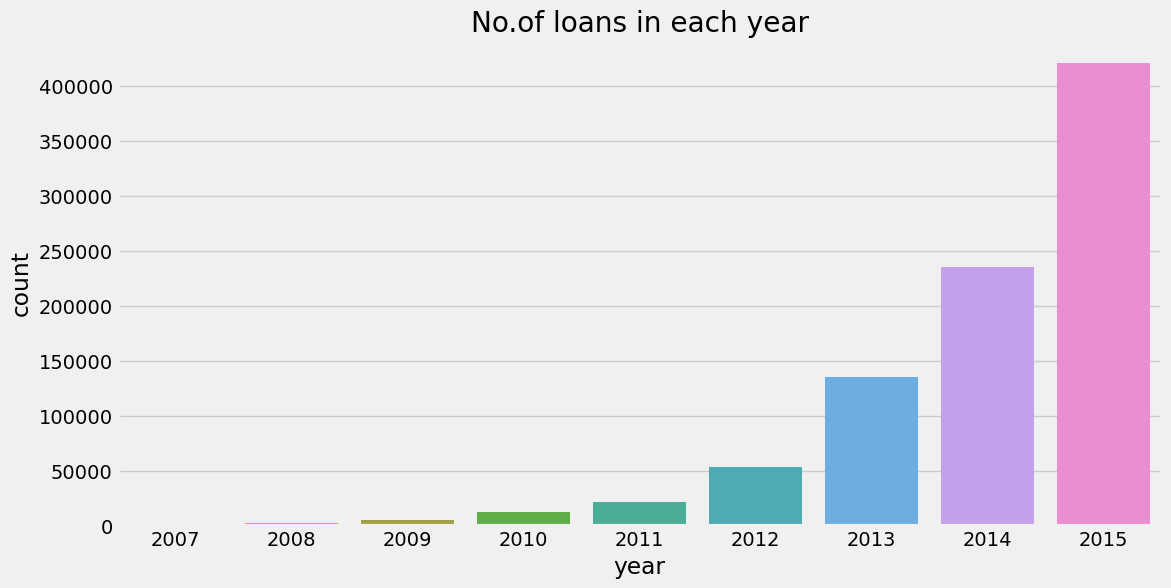

In [ ]:
#data visualization
plt.figure(figsize=(12,6))
sns.countplot(x='year', data=df)
plt.title("No.of loans in each year")

Text(0.5, 1.0, 'Employment tenure vs count')

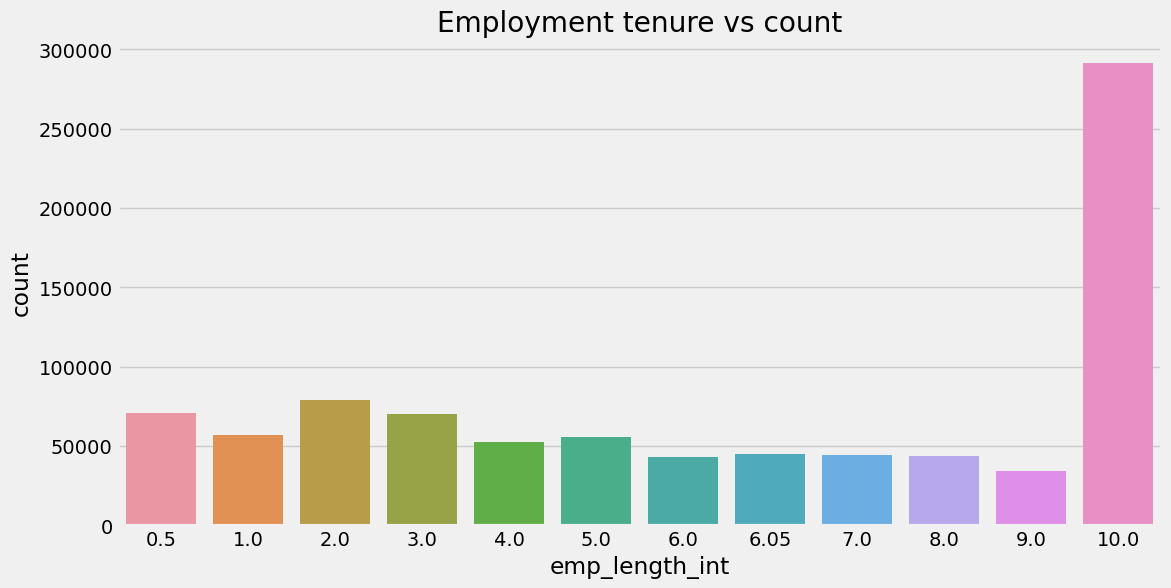

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length_int', data=df)
plt.title("Employment tenure vs count")

Text(0.5, 1.0, 'home ownership type')

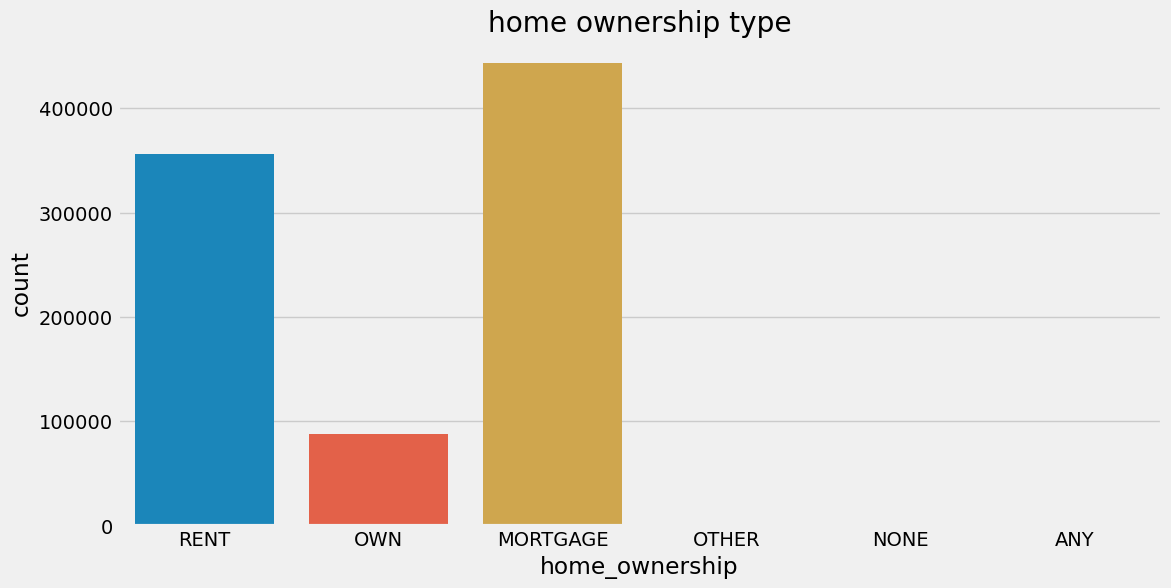

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='home_ownership', data=df)
plt.title("home ownership type")

Text(0.5, 1.0, 'Income category vs count')

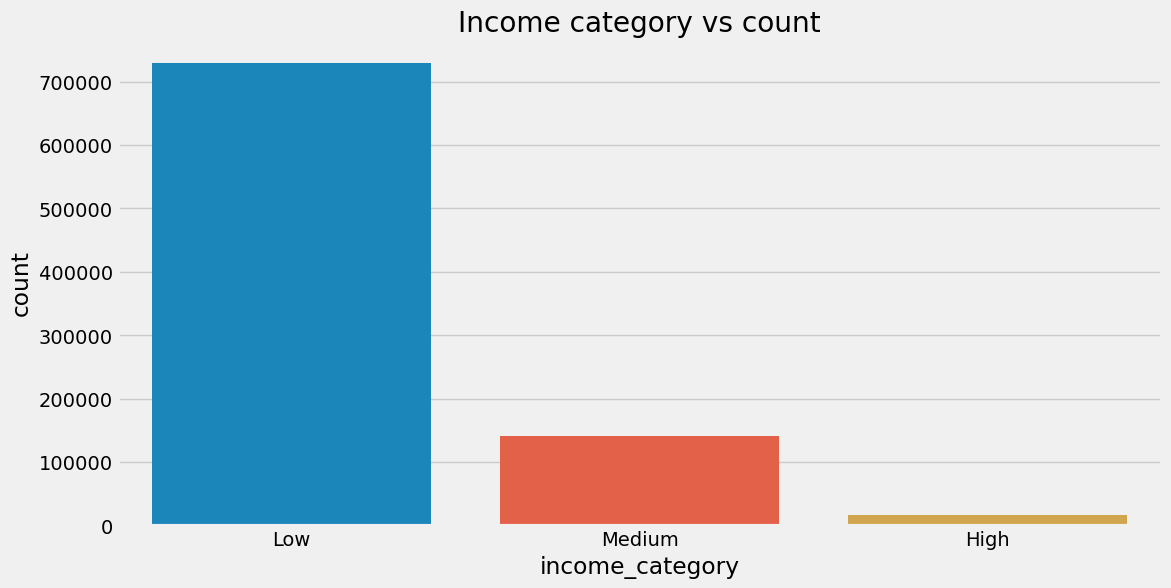

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='income_category', data=df)
plt.title("Income category vs count")

Text(0.5, 1.0, 'Loan time period vs count')

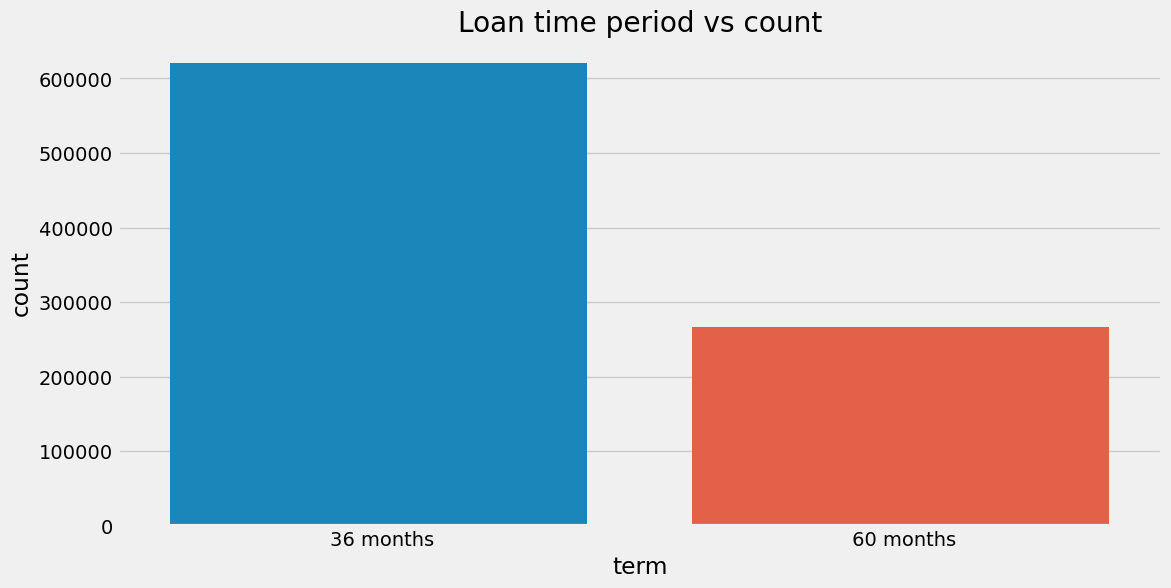

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='term', data=df)
plt.title("Loan time period vs count")


Text(0.5, 1.0, 'application vs count')

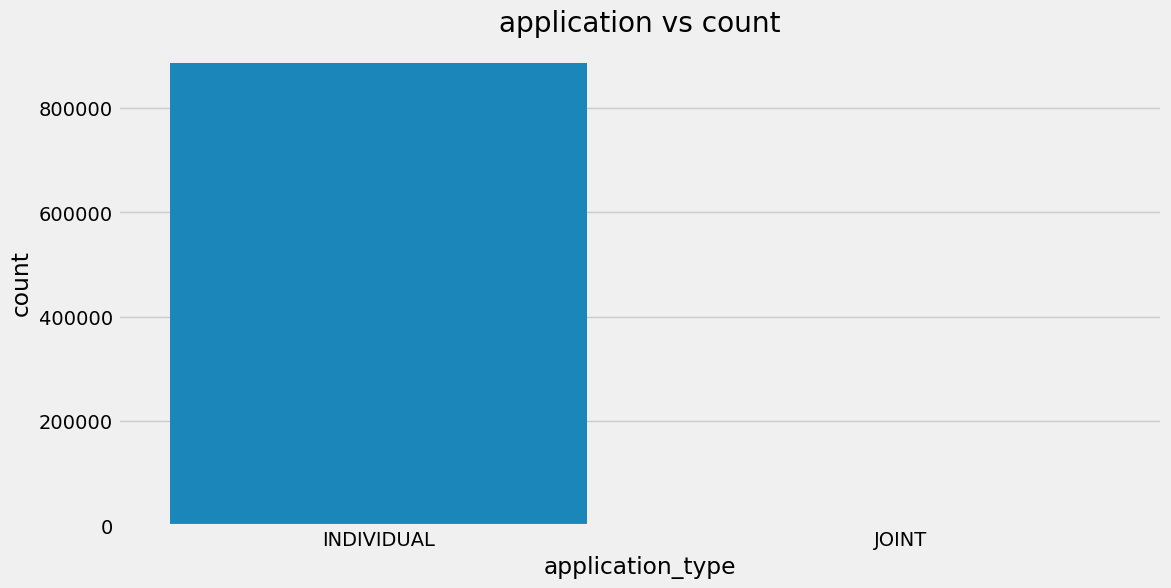

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='application_type', data=df)
plt.title("application vs count")

Text(0.5, 1.0, 'purpose vs count')

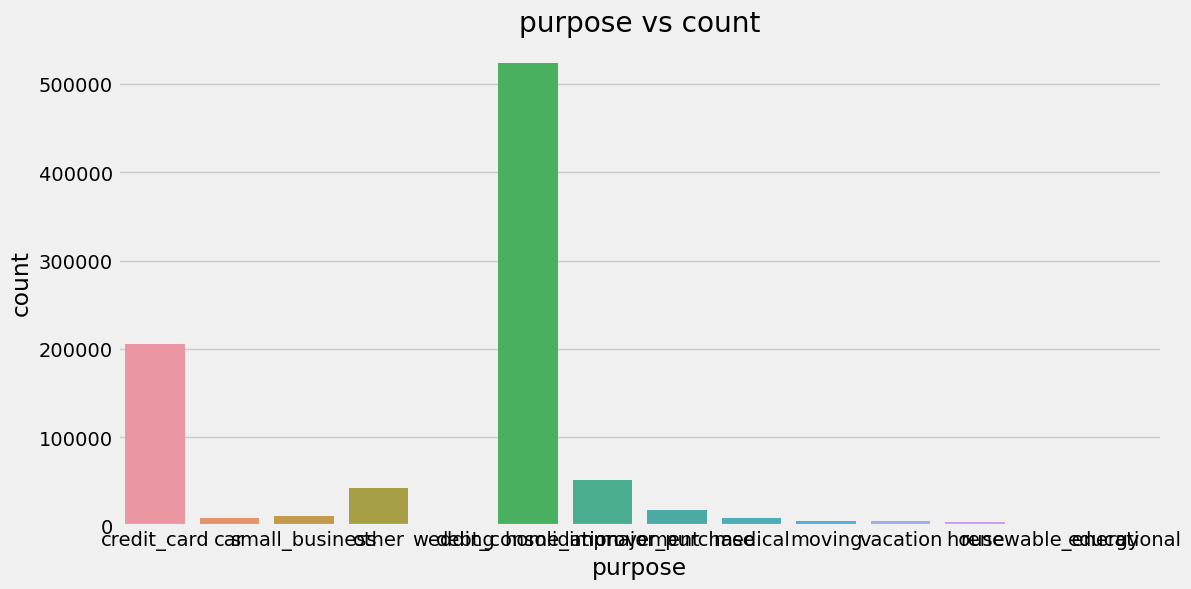

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose', data=df)
plt.title("purpose vs count")

Text(0.5, 1.0, 'Intrest payment vs count')

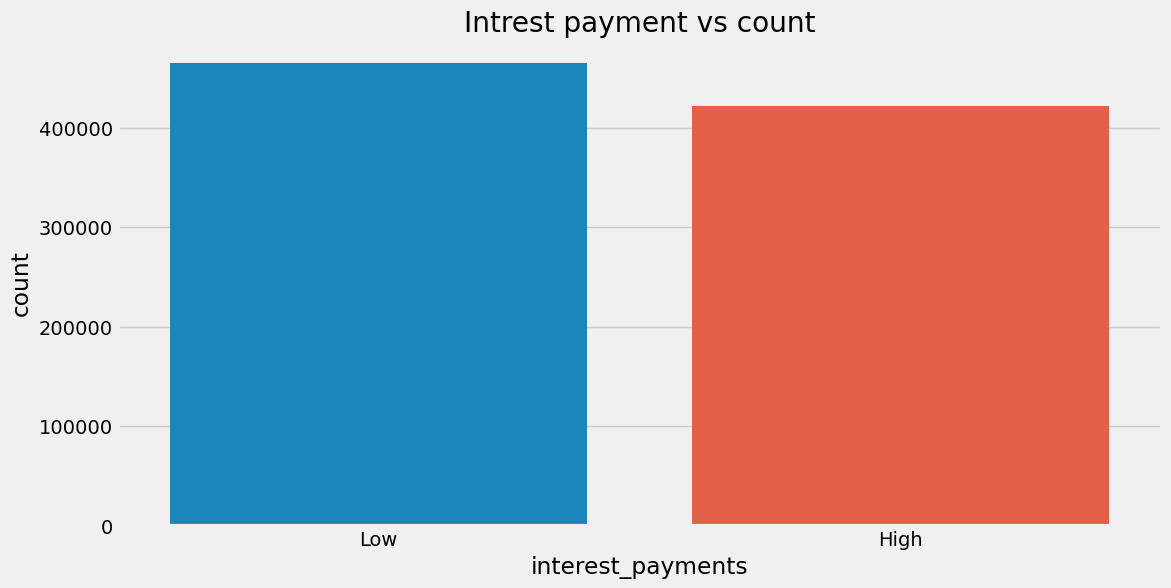

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='interest_payments', data=df)
plt.title("Intrest payment vs count")

Text(0.5, 1.0, 'loan condition vs count')

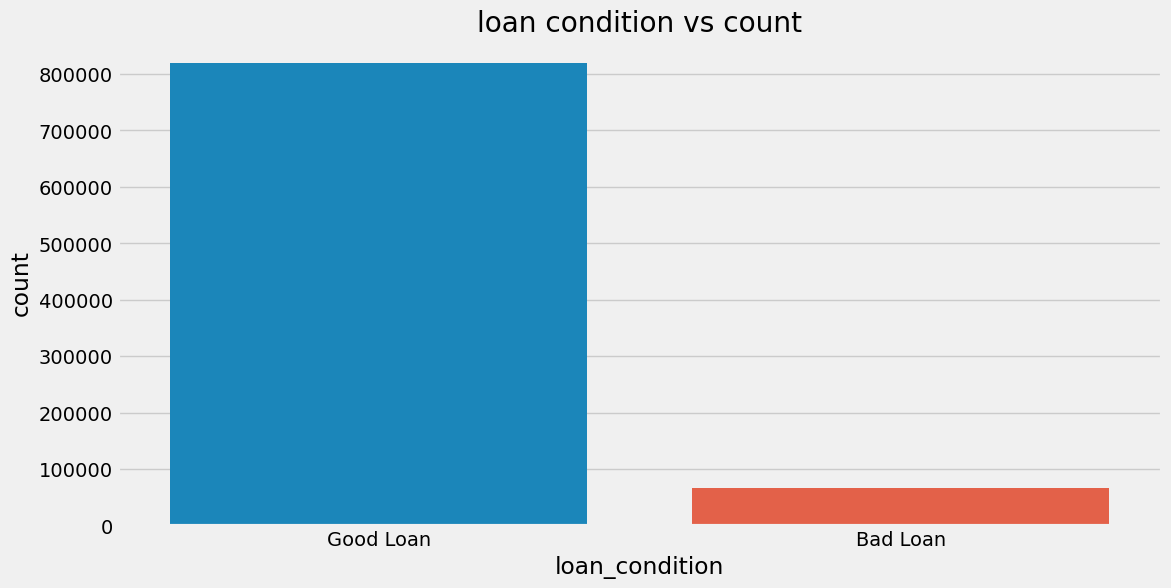

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='loan_condition', data=df)
plt.title("loan condition vs count")

Text(0.5, 1.0, 'Grade vs count')

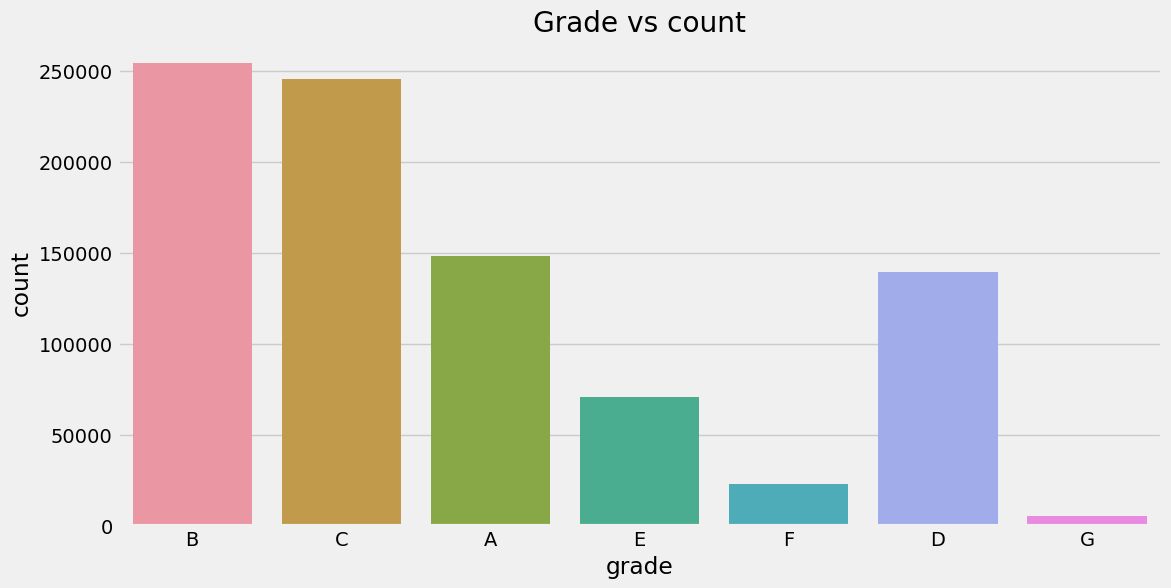

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='grade', data=df)
plt.title("Grade vs count")

Text(0.5, 1.0, 'Region vs count')

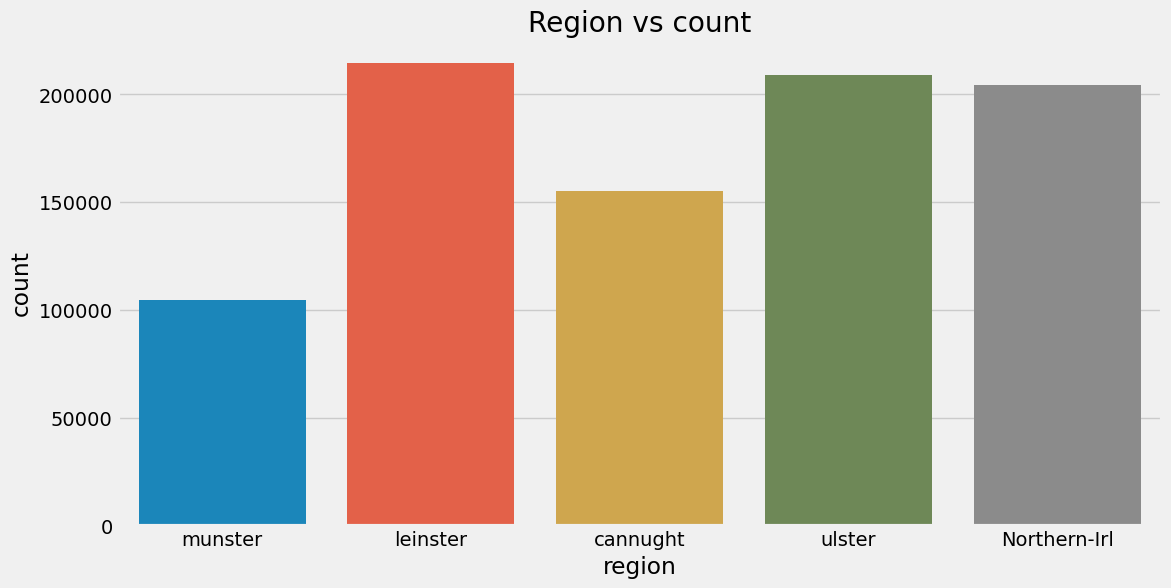

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='region', data=df)
plt.title("Region vs count")

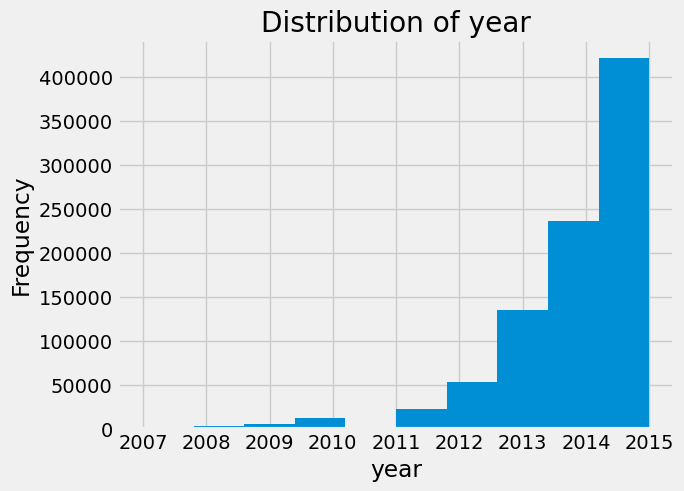

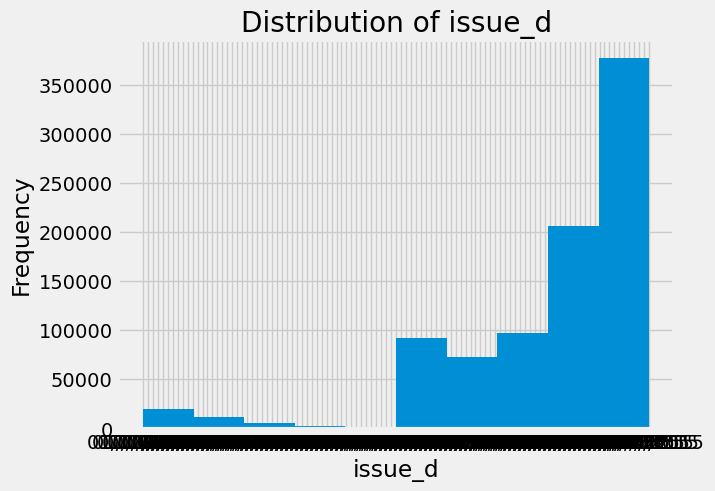

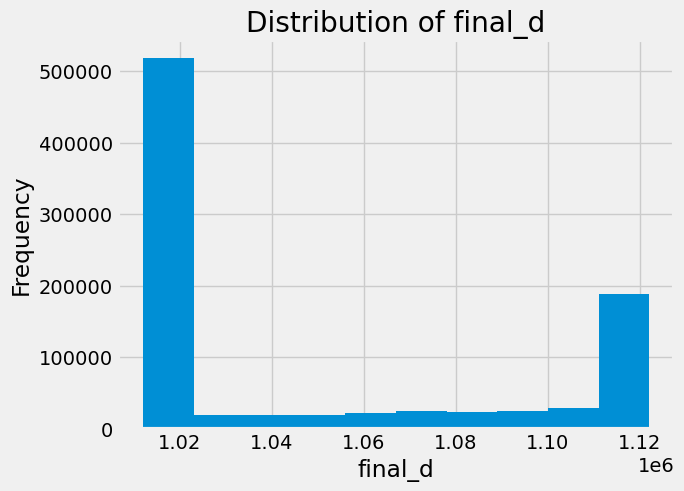

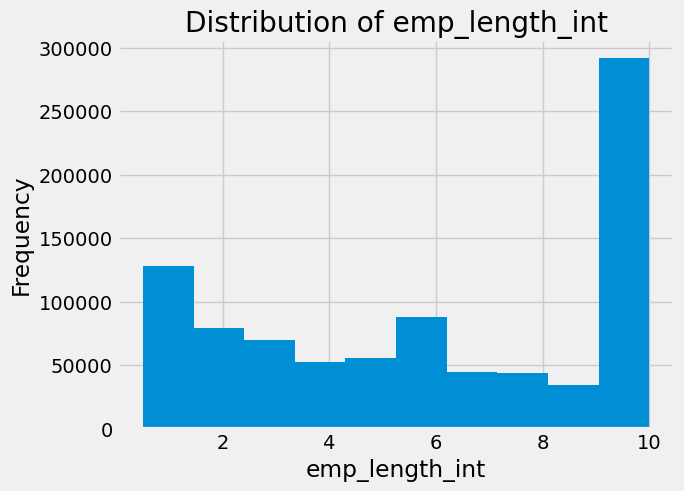

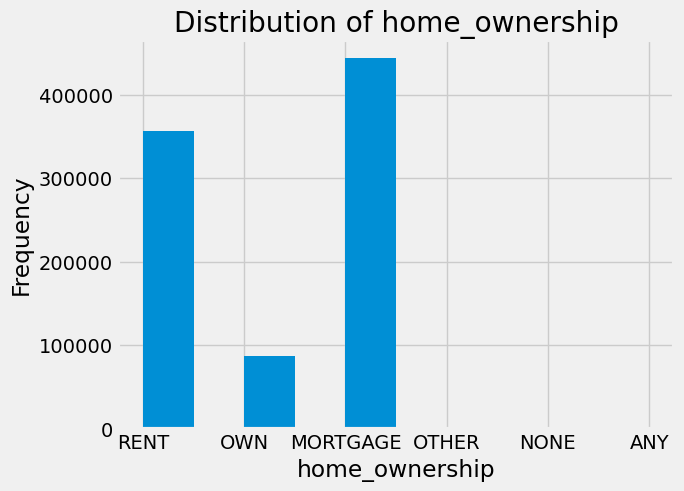

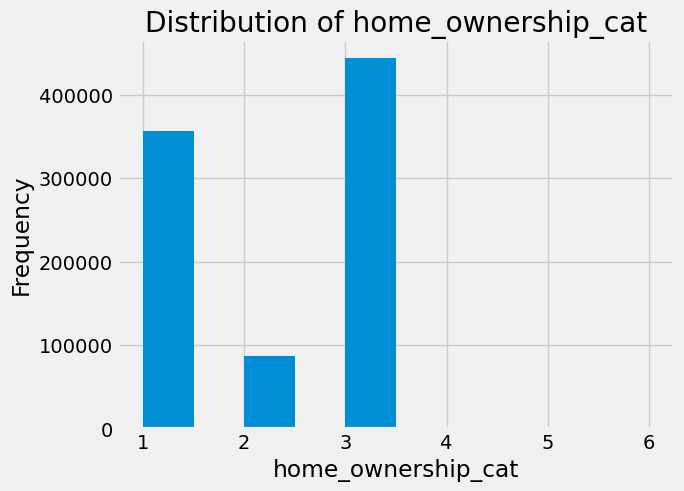

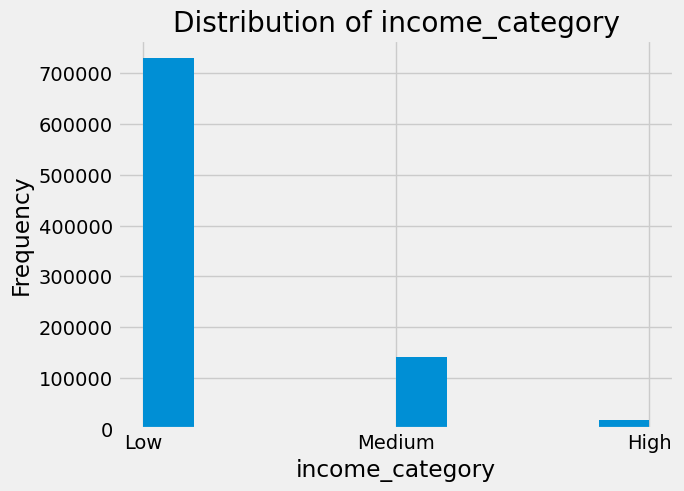

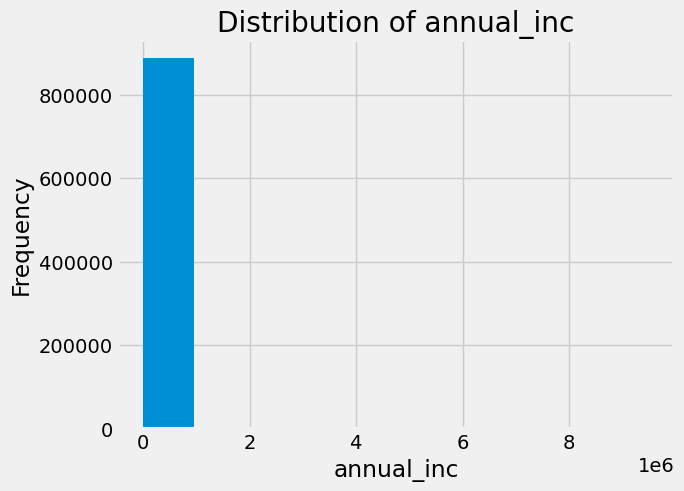

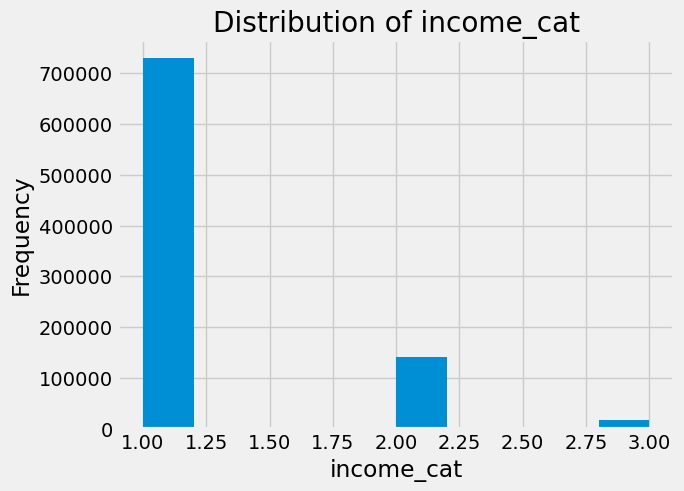

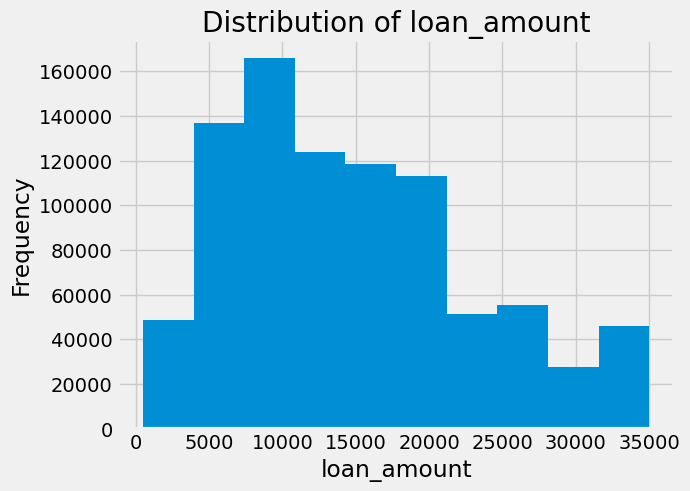

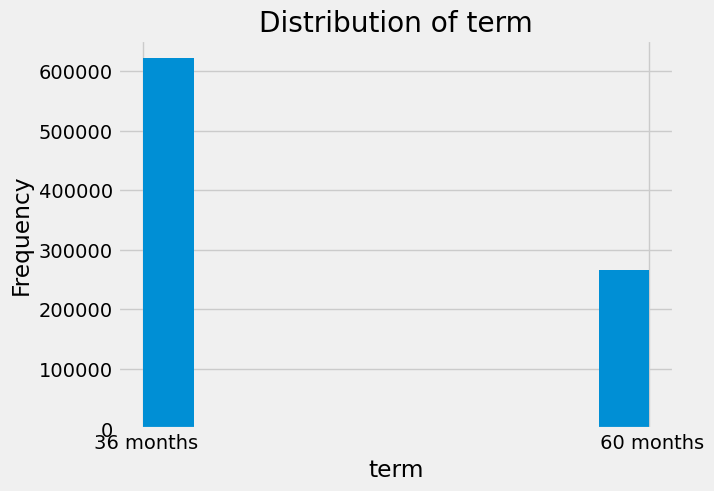

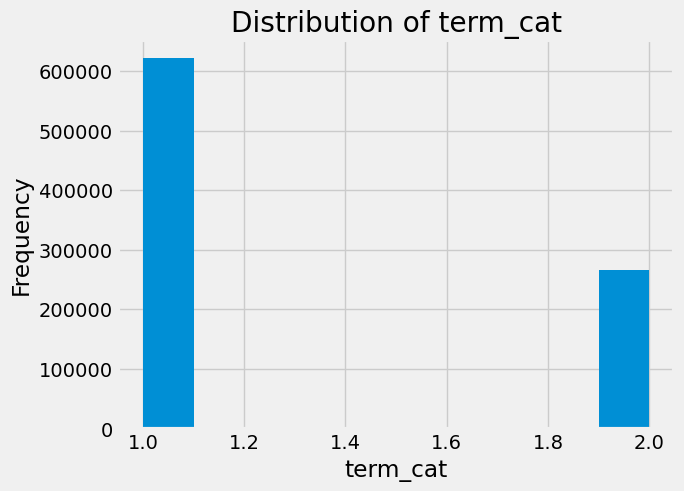

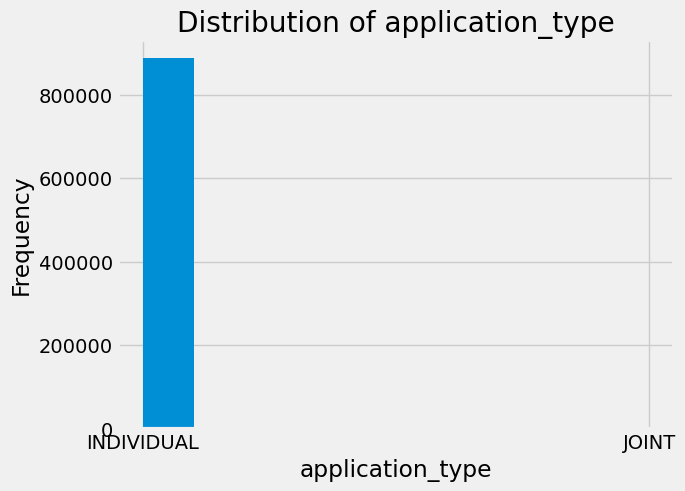

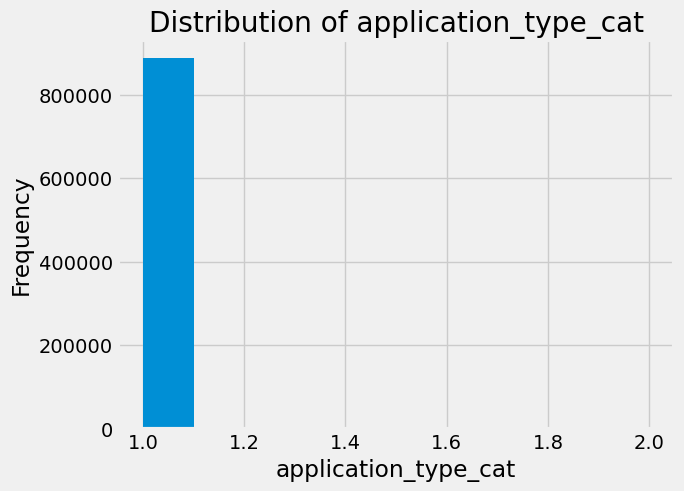

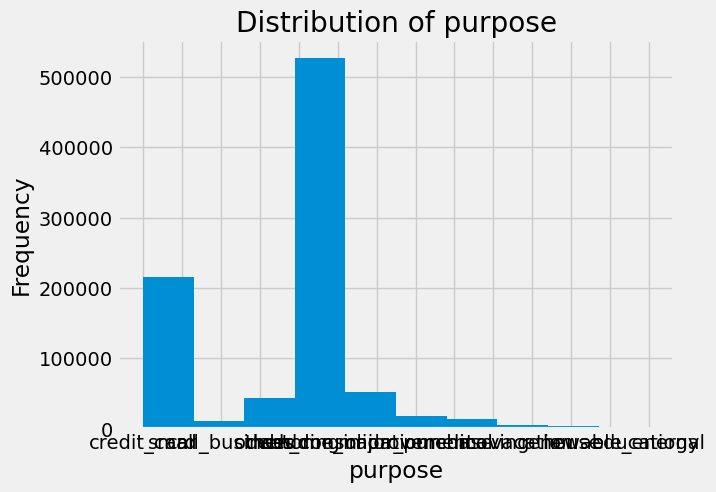

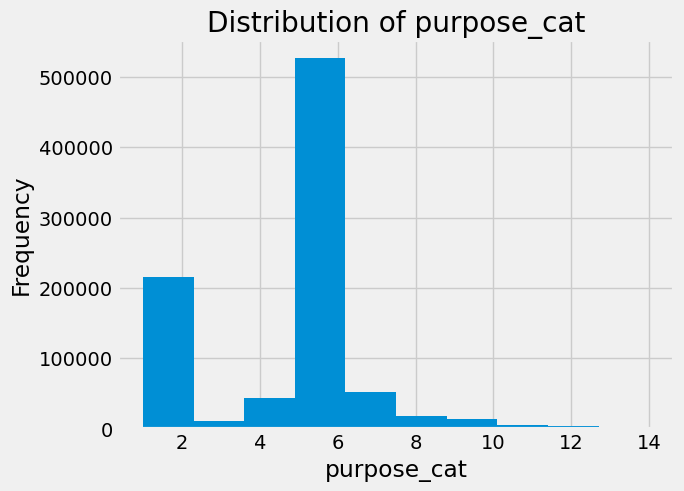

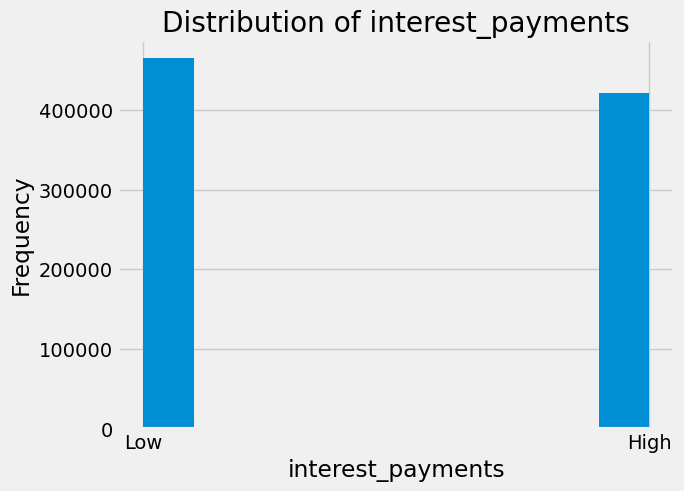

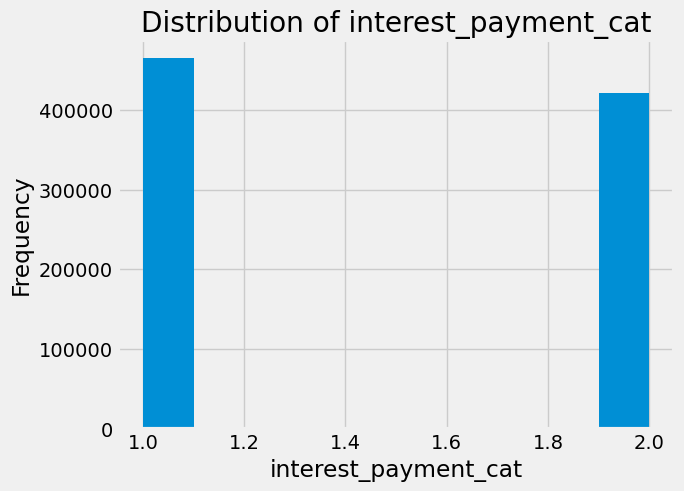

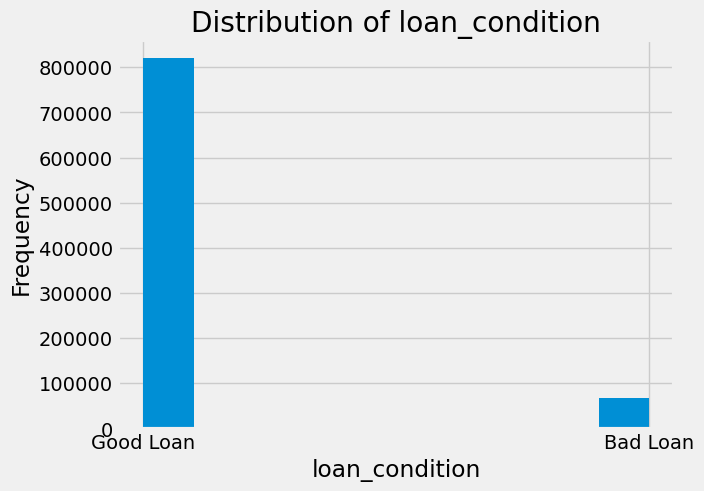

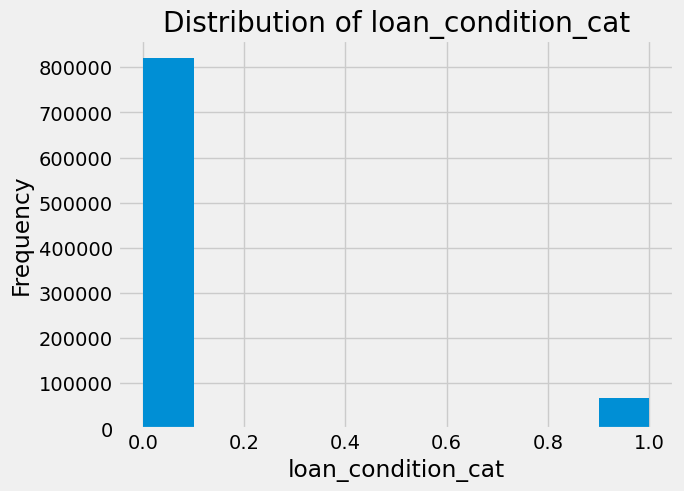

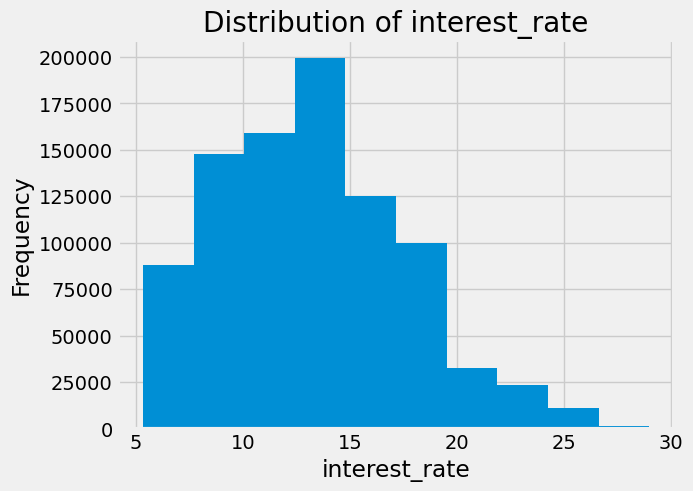

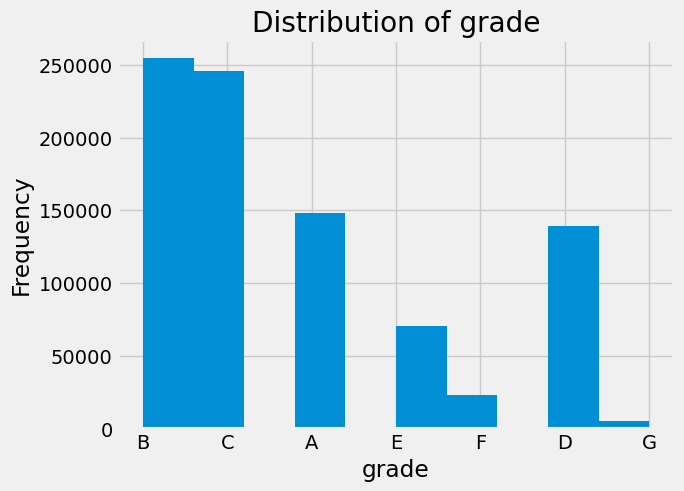

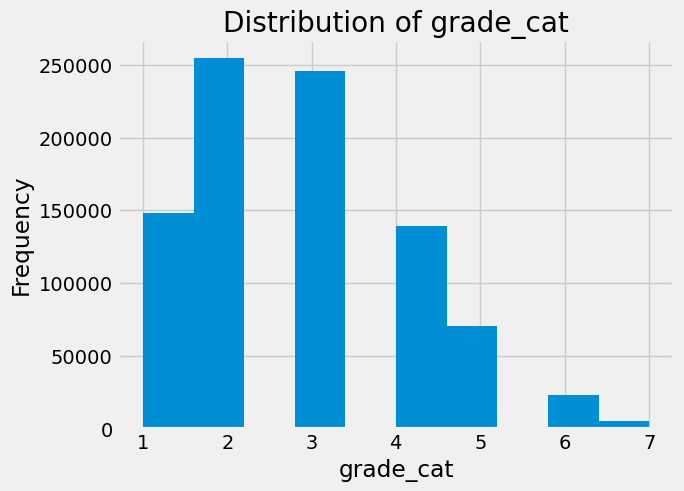

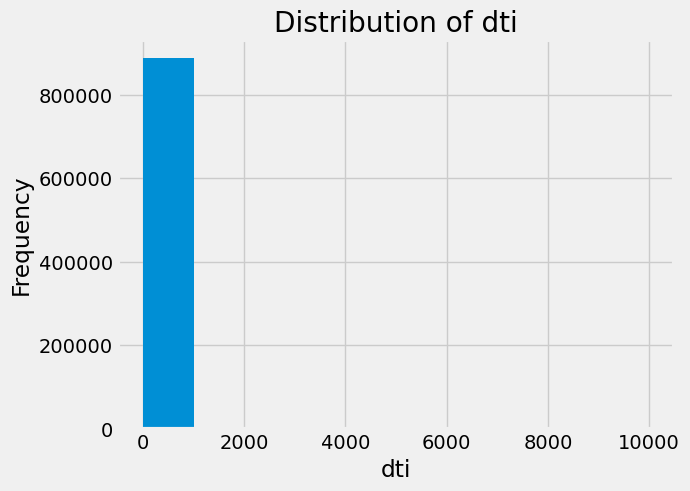

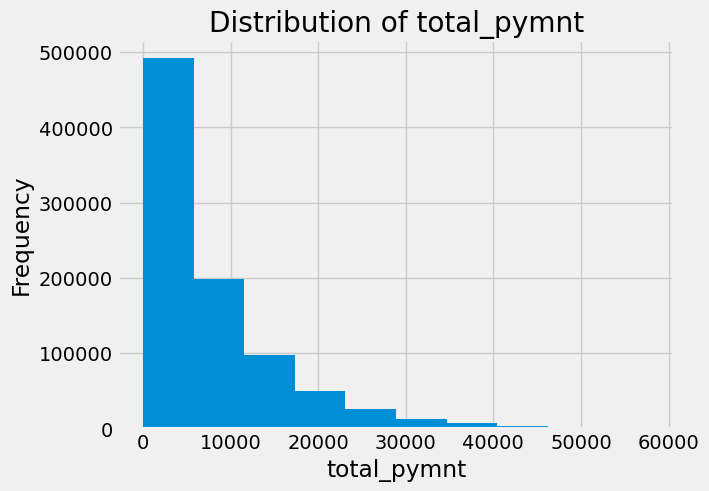

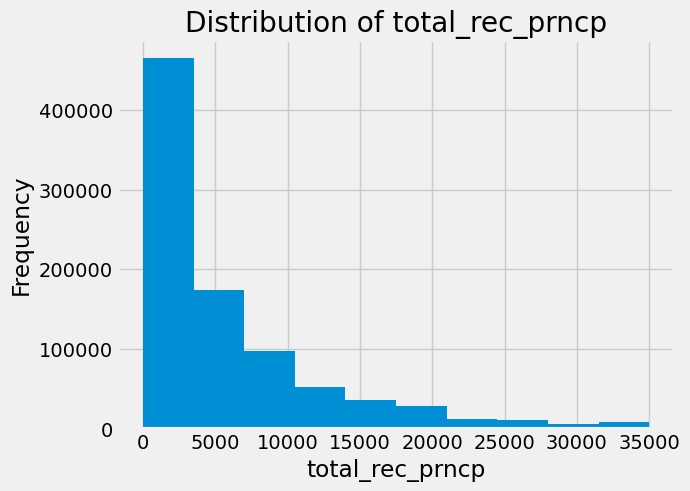

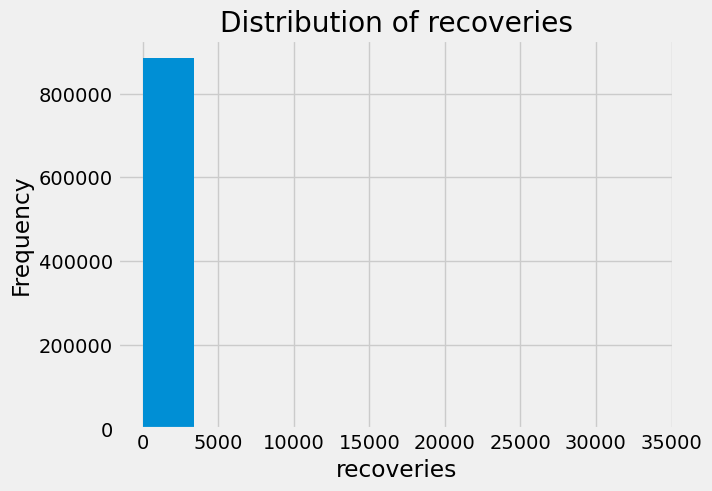

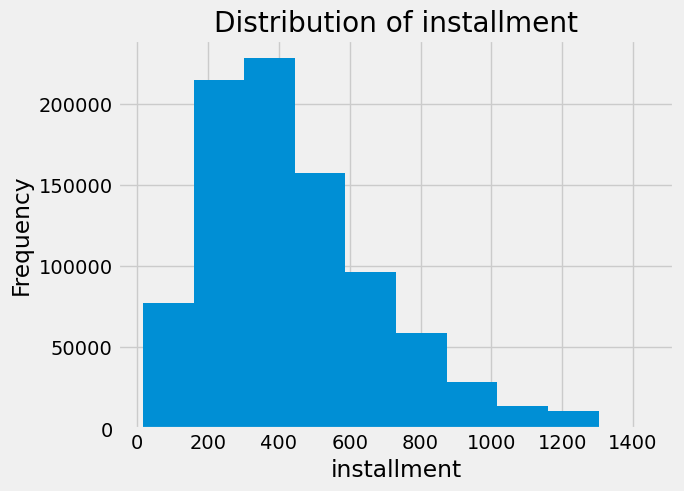

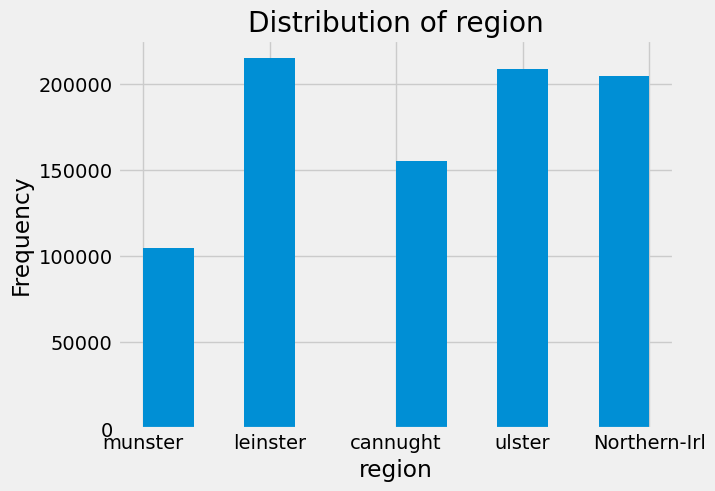

In [ ]:
#styastical analanalysis

# Calculate the descriptive statistics for the data set
df.describe()

# Create histograms for each of the features in the data set
for col in df.columns:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Distribution of ' + col)
    plt.show()

In [ ]:
# Create a list of the features to test
features = ['year', 'emp_length_int', 'home_ownership_cat', 'annual_inc', 'income_cat', 'loan_amount', 'term_cat', 'application_type_cat', 'purpose_cat', 'interest_payment_cat', 'grade_cat', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment']

# For each feature, perform a t-test to compare the mean of the feature for loans in good condition to the mean of the feature for loans in bad condition
for feature in features:
    # Get the mean of the feature for loans in good condition
    good_condition_mean = df[df['loan_condition_cat'] == 'Good'][feature].mean()

    # Get the mean of the feature for loans in bad condition
    bad_condition_mean = df[df['loan_condition_cat'] == 'Bad'][feature].mean()

    # Calculate the p-value
    p_value = stats.ttest_ind(df[df['loan_condition_cat'] == 'Good'][feature], df[df['loan_condition_cat'] == 'Bad'][feature]).pvalue

    # Determine the statistical significance
    alpha = 0.05
    if p_value < alpha:
        print('The feature {} is statistically significant.'.format(feature))
    else:
        print('The feature {} is not statistically significant.'.format(feature))


The feature year is not statistically significant.
The feature emp_length_int is not statistically significant.
The feature home_ownership_cat is not statistically significant.
The feature annual_inc is not statistically significant.
The feature income_cat is not statistically significant.
The feature loan_amount is not statistically significant.
The feature term_cat is not statistically significant.
The feature application_type_cat is not statistically significant.
The feature purpose_cat is not statistically significant.
The feature interest_payment_cat is not statistically significant.
The feature grade_cat is not statistically significant.
The feature dti is not statistically significant.
The feature total_pymnt is not statistically significant.
The feature total_rec_prncp is not statistically significant.
The feature recoveries is not statistically significant.
The feature installment is not statistically significant.


In [ ]:
# Choose the test statistic
test_statistic = df['year'].mean()

# Calculate the p-value
p_value = stats.ttest_1samp(df['year'], 0).pvalue

# Determine the statistical significance
alpha = 0.05
if p_value < alpha:
    print('The null hypothesis is rejected.')
else:
    print('The null hypothesis is not rejected.')

The null hypothesis is rejected.


In [ ]:
from scipy.stats import ttest_ind
# Create a list of the features to test
features = ['year', 'emp_length_int', 'home_ownership_cat', 'annual_inc', 'income_cat', 'loan_amount', 'term_cat', 'application_type_cat', 'purpose_cat', 'interest_payment_cat', 'grade_cat', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment']

# For each feature, perform a t-test to compare the mean of the feature for loans in good condition to the mean of the feature for loans in bad condition
for feature in features:
    # Get the mean of the feature for loans in good condition
    good_condition_mean = df[df['loan_condition_cat'] == 'Good'][feature].mean()

    # Get the mean of the feature for loans in bad condition
    bad_condition_mean = df[df['loan_condition'] == 'Bad'][feature].mean()

    # Calculate the p-value
    p_value = ttest_ind(df[df['loan_condition_cat'] == 'Good'][feature], df[df['loan_condition_cat'] == 'Bad'][feature]).pvalue

    # Determine the statistical significance
    alpha = 0.05
    if p_value < alpha:
        print('The feature {} is statistically significant.'.format(feature))
    else:
        print('The feature {} is not statistically significant.'.format(feature))

    # Print the p-value
    print('The p-value for the feature {} is {}'.format(feature, p_value))

The feature year is not statistically significant.
The p-value for the feature year is nan
The feature emp_length_int is not statistically significant.
The p-value for the feature emp_length_int is nan
The feature home_ownership_cat is not statistically significant.
The p-value for the feature home_ownership_cat is nan
The feature annual_inc is not statistically significant.
The p-value for the feature annual_inc is nan
The feature income_cat is not statistically significant.
The p-value for the feature income_cat is nan
The feature loan_amount is not statistically significant.
The p-value for the feature loan_amount is nan
The feature term_cat is not statistically significant.
The p-value for the feature term_cat is nan
The feature application_type_cat is not statistically significant.
The p-value for the feature application_type_cat is nan
The feature purpose_cat is not statistically significant.
The p-value for the feature purpose_cat is nan
The feature interest_payment_cat is not s

In [ ]:
import pandas as pd
from scipy.stats import zscore


# Select the feature to calculate the z-score for
feature = 'loan_amount'

# Calculate the z-score for the feature
z_score = zscore(df[feature])

# Print the z-score
print('The z-score for the feature {} is {}'.format(feature, z_score))


The z-score for the feature loan_amount is 0        -1.156460
1        -1.452829
2        -1.464683
3        -0.563724
4        -1.393555
            ...   
887374   -0.563724
887375    1.095939
887376   -0.208082
887377   -0.326629
887378    0.621749
Name: loan_amount, Length: 887379, dtype: float64


In [ ]:
import pandas as pd
from scipy.stats import zscore
# Select the variables to calculate the z-scores for
variables = ['year', 'emp_length_int', 'home_ownership_cat', 'annual_inc', 'income_cat', 'loan_amount', 'term_cat', 'application_type_cat', 'purpose_cat', 'interest_payment_cat', 'interest_rate', 'grade_cat', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment']

# Calculate the z-scores for the selected variables
df_zscores = df[variables].apply(zscore, axis=0)

# Print the z-scores for the selected variables
print(df_zscores)

            year  emp_length_int  home_ownership_cat  annual_inc  income_cat  \
0      -2.394914        1.126029           -1.163300   -0.788703   -0.444482   
1      -2.394914       -1.582528           -1.163300   -0.695964   -0.444482   
2      -2.394914        1.126029           -1.163300   -0.970285   -0.444482   
3      -2.394914        1.126029           -1.163300   -0.399202   -0.444482   
4      -2.394914       -1.439973           -1.163300    0.076856   -0.444482   
...          ...             ...                 ...         ...         ...   
887374  0.775309        0.555806           -1.163300   -0.680508   -0.444482   
887375  0.775309        1.126029            0.953465    0.061399   -0.444482   
887376  0.775309       -0.299528           -1.163300   -0.618682   -0.444482   
887377  0.775309       -1.439973           -1.163300   -0.164264   -0.444482   
887378  0.775309        1.126029           -1.163300    0.385984   -0.444482   

        loan_amount  term_cat  applicat

In [ ]:
import pandas as pd



# Select the variables to calculate the correlation with
variables = ['year', 'emp_length_int', 'home_ownership_cat', 'annual_inc', 'income_cat', 'loan_amount', 'term_cat', 'application_type_cat', 'purpose_cat', 'interest_payment_cat', 'loan_condition_cat', 'interest_rate', 'grade_cat', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment']

# Calculate the correlation matrix
correlation_matrix = df[variables].corr()

# Print the correlation matrix
print(correlation_matrix)

                          year  emp_length_int  home_ownership_cat  \
year                  1.000000        0.048980            0.019558   
emp_length_int        0.048980        1.000000            0.204312   
home_ownership_cat    0.019558        0.204312            1.000000   
annual_inc            0.035911        0.063382            0.154832   
income_cat            0.037992        0.039226            0.156441   
loan_amount           0.103722        0.103898            0.196269   
term_cat              0.081026        0.067528            0.109770   
application_type_cat  0.018610        0.000525            0.009016   
purpose_cat          -0.036398        0.019169            0.022575   
interest_payment_cat -0.049023        0.007701           -0.050201   
loan_condition_cat   -0.165122       -0.015821           -0.037253   
interest_rate        -0.063632        0.008943           -0.064271   
grade_cat             0.016914        0.004301           -0.062029   
dti                 

In [ ]:
import pandas as pd
import numpy as np

# Create a list of the variables you want to select
selected_variables = ['year', 'emp_length_int', 'home_ownership_cat', 'annual_inc', 'income_cat', 'loan_amount', 'term_cat', 'application_type_cat', 'purpose_cat', 'interest_payment_cat','loan_condition_cat', 'interest_rate', 'grade_cat', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment']

# Load the data set and select the selected variables
df = pd.read_csv('loan_final313.csv', usecols=selected_variables)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Select the features that exceed the correlation threshold
correlation_threshold = 0.5
selected_features = correlation_matrix.loc[(correlation_matrix['loan_condition_cat'] >= correlation_threshold) | (correlation_matrix['loan_condition_cat'] <= -correlation_threshold), :].columns

# Print the selected features
print(selected_features)


Index(['year', 'emp_length_int', 'home_ownership_cat', 'annual_inc',
       'income_cat', 'loan_amount', 'term_cat', 'application_type_cat',
       'purpose_cat', 'interest_payment_cat', 'loan_condition_cat',
       'interest_rate', 'grade_cat', 'dti', 'total_pymnt', 'total_rec_prncp',
       'recoveries', 'installment'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score



# Select the variables you want to use
selected_variables = ['year', 'emp_length_int', 'home_ownership_cat', 'annual_inc','income_cat','loan_amount','term_cat','application_type_cat','purpose_cat','interest_payment_cat','interest_rate','grade_cat','dti','total_pymnt','total_rec_prncp','recoveries','installment']

# Create a new dataframe with the selected variables
X = df[selected_variables]
y = df['loan_condition_cat']

# Split the dataset into training and test sets with 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
X_train.head()

,year,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
329489,2014,5.0,2,47000,1,16000,2,1,6,2,16.29,4,36.21,6698.74000,3308.94,0.0,391.56
510073,2015,7.0,3,90000,1,6350,1,1,6,1,12.59,3,17.83,208.27000,146.09,0.0,212.71
905,2011,6.0,3,45500,1,10000,1,1,1,1,10.65,2,8.78,11570.11819,10000.00,0.0,325.74
333036,2014,8.0,3,55000,1,4800,1,1,6,1,11.67,2,8.16,2697.56000,2059.59,0.0,158.68
298787,2014,0.5,1,34000,1,4500,1,1,6,1,12.99,3,28.24,1819.32000,1311.00,0.0,151.61


In [ ]:
X_test.head()

,year,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
550946,2015,8.0,1,78000,1,8000,1,1,8,2,15.61,4,25.71,8079.79,8000.00,0.0,279.72
292628,2014,3.0,1,81700,1,21000,1,1,6,1,10.15,2,22.33,10186.50,7984.24,0.0,679.10
739899,2015,10.0,3,78000,1,19725,1,1,6,1,7.89,1,14.12,20360.22,19725.00,0.0,617.11
302859,2014,9.0,1,35000,1,8000,1,1,6,2,15.61,4,32.07,4227.73,2888.78,0.0,279.72
653323,2015,10.0,1,85000,1,35000,1,1,6,2,16.99,4,25.19,6205.36,3868.70,0.0,1247.68


In [ ]:
# Train the logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the model on the test set
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.9515821857603282


In [ ]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 656014, 1: 53889})

In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[163906     30]
 [  8563   4977]]


Accuracy of Logistic Regression: 95.15821857603282 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97    163936
           1       0.99      0.37      0.54     13540

    accuracy                           0.95    177476
   macro avg       0.97      0.68      0.76    177476
weighted avg       0.95      0.95      0.94    177476



In [ ]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[163936      0]
 [  8581   4959]]


Accuracy of Naive Bayes model: 95.16498005364106 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97    163936
           1       1.00      0.37      0.54     13540

    accuracy                           0.95    177476
   macro avg       0.98      0.68      0.76    177476
weighted avg       0.95      0.95      0.94    177476



In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[163936      0]
 [  8577   4963]]


Accuracy of Random Forest: 95.16723387951048 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97    163936
           1       1.00      0.37      0.54     13540

    accuracy                           0.95    177476
   macro avg       0.98      0.68      0.76    177476
weighted avg       0.95      0.95      0.94    177476



In [ ]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[163936      0]
 [ 13540      0]]


Accuracy of Extreme Gradient Boost: 92.37079943203588 



C:\Users\saipr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96    163936
           1       0.00      0.00      0.00     13540

    accuracy                           0.92    177476
   macro avg       0.46      0.50      0.48    177476
weighted avg       0.85      0.92      0.89    177476



C:\Users\saipr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saipr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[163343    593]
 [  7396   6144]]


Accuracy of DecisionTreeClassifier: 95.49854628231424 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    163936
           1       0.91      0.45      0.61     13540

    accuracy                           0.95    177476
   macro avg       0.93      0.73      0.79    177476
weighted avg       0.95      0.95      0.95    177476



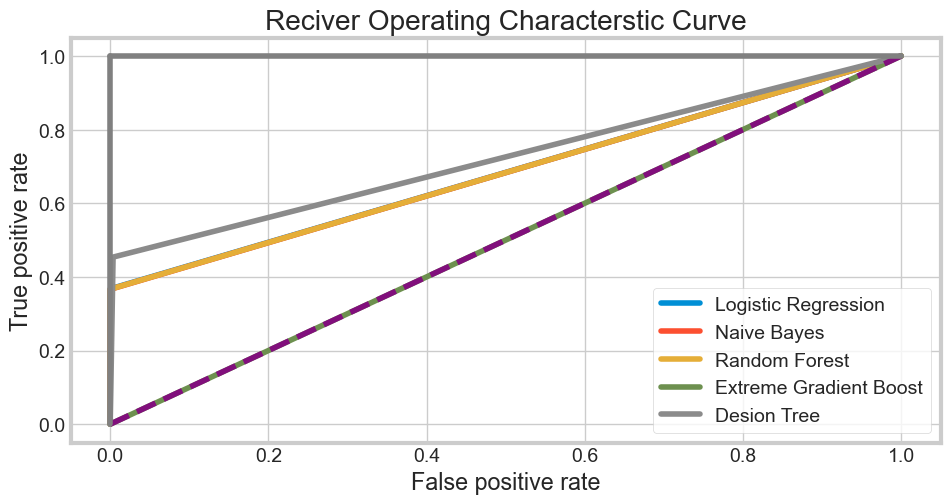

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)

dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)



sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')

plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'Decision Tree'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,dt_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,95.158219
1,Naive Bayes,95.164980
2,Random Forest,95.167234
3,Extreme Gradient Boost,92.370799
4,Decision Tree,95.498546


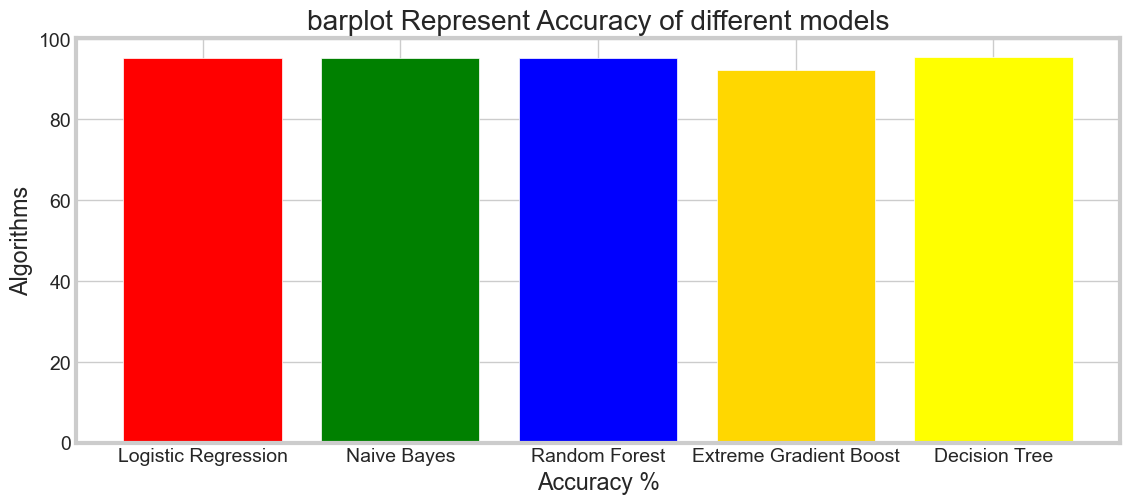

In [ ]:
colors = ['red','green','blue','gold','yellow']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()